# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("Keep 'er moving'")

Keep 'er moving'
City Name: kapaa, City ID: 5848280
City Name: antofagasta, City ID: 3899539
Keep 'er moving'
City Name: hithadhoo, City ID: 1282256
City Name: fallon, City ID: 5503914
City Name: san patricio, City ID: 4726521
City Name: dunedin, City ID: 2191562
Keep 'er moving'
City Name: rikitea, City ID: 4030556
City Name: jamestown, City ID: 5122534
City Name: opuwo, City ID: 3354077
City Name: yellowknife, City ID: 6185377
City Name: hobart, City ID: 2163355
City Name: sinnamary, City ID: 3380290
City Name: bourail, City ID: 2141714
Keep 'er moving'
City Name: tiksi, City ID: 2015306
Keep 'er moving'
City Name: busselton, City ID: 2075265
City Name: hilo, City ID: 5855927
City Name: port alfred, City ID: 964432
City Name: punta arenas, City ID: 3874787
City Name: butaritari, City ID: 2110227
City Name: estelle, City ID: 4323873
City Name: cape town, City ID: 3369157
City Name: connersville, City ID: 4256085
City Name: avarua, City ID: 4035715
City Name: chicama, City ID: 3698359


City Name: yantzaza, City ID: 3650053
City Name: bandarbeyla, City ID: 64814
City Name: tias, City ID: 2510485
City Name: laguna, City ID: 5364271
City Name: vestmanna, City ID: 2610343
City Name: waipawa, City ID: 2206874
City Name: hennebont, City ID: 3013521
Keep 'er moving'
City Name: bundaberg, City ID: 2173323
Keep 'er moving'
City Name: zapolyarnyy, City ID: 464790
City Name: goderich, City ID: 5962442
City Name: auki, City ID: 2109701
City Name: khonsa, City ID: 1266668
City Name: cayenne, City ID: 3382160
City Name: farafangana, City ID: 1065158
City Name: taupo, City ID: 2181742
City Name: puerto ayora, City ID: 3652764
City Name: new norfolk, City ID: 2155415
City Name: zhangye, City ID: 1785036
City Name: alyangula, City ID: 2079582
City Name: palanpur, City ID: 1260777
City Name: myitkyina, City ID: 1307741
City Name: camargo, City ID: 4013724
City Name: linguere, City ID: 2249281
City Name: tessalit, City ID: 2449893
City Name: kota kinabalu, City ID: 1733432
City Name: n

City Name: lazaro cardenas, City ID: 4026082
Keep 'er moving'
City Name: manyana, City ID: 933416
City Name: ambon, City ID: 1651531
Keep 'er moving'
City Name: airai, City ID: 1651810
City Name: marivan, City ID: 97572
City Name: dedza, City ID: 930025
City Name: hohhot, City ID: 2036892
City Name: assiniboia, City ID: 5887798
City Name: hualmay, City ID: 3939761
City Name: hobyo, City ID: 57000
City Name: san andres, City ID: 3670218
City Name: ilulissat, City ID: 3423146
City Name: ko samui, City ID: 1154689
City Name: nhulunbuy, City ID: 2064735
City Name: dubrovka, City ID: 564487
City Name: longyearbyen, City ID: 2729907
City Name: port hardy, City ID: 6111862
City Name: tignere, City ID: 2221513
City Name: birjand, City ID: 140463
City Name: menongue, City ID: 3347353
City Name: illapel, City ID: 3887344
City Name: riosucio, City ID: 3670719
City Name: dongsheng, City ID: 1812256
City Name: fare, City ID: 4034496
City Name: umtata, City ID: 946058
City Name: coxim, City ID: 3465

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert the data into a dataframe
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country Code": country_list, "Latitude": lat_list, "Longitude": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()

,City ID,City,Country Code,Latitude,Longitude,Temperature,Humidity,Clouds,Wind Speed
0,5848280,Kapaa,US,22.0752,-159.3190,72.61,88,90,25.32
1,3899539,Antofagasta,CL,-23.6500,-70.4000,69.80,73,20,6.91
2,1282256,Hithadhoo,MV,-0.6000,73.0833,83.64,64,94,5.08
3,5503914,Fallon,US,39.4735,-118.7774,44.60,26,75,11.50
4,4726521,San Patricio,US,28.0170,-97.5169,67.64,83,1,19.57


In [5]:
cities_df.to_csv("city_weather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
cities_df.describe()


,City ID,Latitude,Longitude,Temperature,Humidity,Clouds,Wind Speed
count,5.500000e+02,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,2.670497e+06,20.647434,21.508651,51.166364,72.149091,49.481818,7.922727
std,1.642442e+06,33.750524,91.824575,29.552314,19.302112,40.352936,5.851996
min,5.567100e+04,-54.800000,-175.200000,-31.580000,6.000000,0.000000,0.380000
25%,1.503334e+06,-8.248475,-59.317125,32.170000,60.000000,2.000000,3.597500
50%,2.159999e+06,25.165200,28.892200,60.855000,77.000000,50.000000,6.845000
75%,3.662242e+06,49.721000,101.039375,74.745000,87.000000,90.000000,10.390000
max,7.671223e+06,78.218600,178.416700,93.200000,100.000000,100.000000,40.290000


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

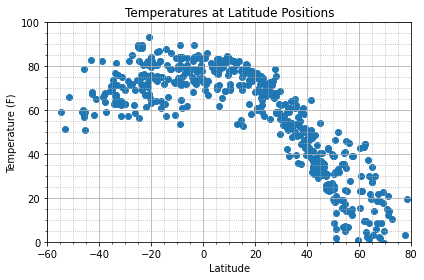

<Figure size 432x288 with 0 Axes>

In [16]:
x_values = cities_df["Latitude"]
y_values = cities_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Latitude vs Temperature.png")

## Latitude vs. Humidity Plot

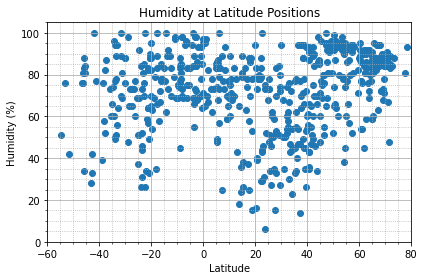

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = cities_df["Latitude"]
y_values = cities_df["Humidity"]
plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

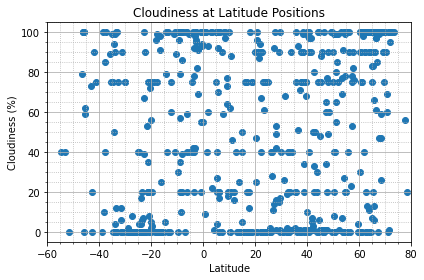

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = cities_df["Latitude"]
y_values = cities_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Latitude vs. Cloudiness.png")

## Latitude vs. Wind Speed Plot

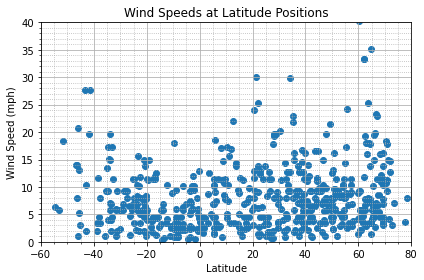

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = cities_df["Latitude"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Latitude vs. Wind Speed.png")

## Linear Regression

In [25]:
northern = cities_df.loc[cities_df["Latitude"] >= 0.0]
northern.reset_index(inplace=True)

southern = cities_df.loc[cities_df["Latitude"] < 0.0]
southern.reset_index(inplace=True)
#northern.head()
southern.head()

,index,City ID,City,Country Code,Latitude,Longitude,Temperature,Humidity,Clouds,Wind Speed
0,1,3899539,Antofagasta,CL,-23.6500,-70.4000,69.80,73,20,6.91
1,2,1282256,Hithadhoo,MV,-0.6000,73.0833,83.64,64,94,5.08
2,5,2191562,Dunedin,NZ,-45.8742,170.5036,57.63,83,100,1.01
3,6,4030556,Rikitea,PF,-23.1203,-134.9692,80.78,81,7,15.57
4,8,3354077,Opuwo,NA,-18.0607,13.8400,64.08,35,96,1.86


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression